# 📘 Welcome to the Arabic Text Summarization Project

## Overview
Welcome, students 👩‍🎓👨‍🎓, to our exciting journey into the world of Natural Language Processing (NLP)! In this project, we'll be delving into the fascinating task of text summarization with a focus on the Arabic language 📚. Our goal is to develop a model that can efficiently summarize Arabic text, making it easier to grasp the essence of large documents quickly 🚀.

## Project Objectives
- **Understanding Text Summarization**: Learn the fundamentals of how text summarization works 📝.
- **Exploring NLP Models**: Get hands-on experience with advanced NLP models like AraGPT2 🤖.
- **Model Fine-Tuning and Training**: Discover how to fine-tune pre-trained models on a custom dataset for specific tasks like summarization 🧠.
- **Practical Application**: Apply your knowledge to build a model that can summarize Arabic texts 🌐.

## Dataset
We'll be using a custom dataset of Arabic texts and their summaries 📖. This dataset will allow us to train our model to understand and generate concise summaries.

We generated this dataset using ChatGPT 😜
If you've read this sentence, send me a message.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ⚠️ **Important: Use GPU Runtime** ⚠️

To ensure this notebook functions correctly and efficiently, it is **crucial to use a GPU runtime**. Follow these steps to enable GPU acceleration:

1. **Open Runtime settings**: At the top of the page, click on `Runtime` in the menu bar. 🔄

2. **Change the runtime type**: In the dropdown menu, select `Change runtime type`. 🛠️

3. **Select GPU as the hardware accelerator**: In the dialog that appears, under `Hardware accelerator`, choose `GPU T4` from the dropdown menu. 🖥️

4. **Save the settings**: Click `Save` to apply the changes. 💾

By enabling GPU, the computations in this notebook will be significantly faster, especially for tasks like training neural networks, processing large datasets, or performing complex calculations.


## PART1: Load AraGPT2

Using the link below, learn how to load araGPT2 base model.

https://huggingface.co/aubmindlab/aragpt2-base

In [ ]:
!pip install arabert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186460 sha256=2a81133a3f7ad1e0ad9c20f3799ef5c7fd5ba75c9bf3fff9abba8603a81e9141
  Stored in directory: /root/.cache/pip/wheels/10/f0/fd/4813b1177405693e8da9cdea839f0fb64fde161380e058c827
Successfully built emoji


In [ ]:
from transformers import GPT2TokenizerFast, pipeline
from transformers import GPT2LMHeadModel
from arabert.aragpt2.grover.modeling_gpt2 import GPT2LMHeadModel
from arabert.preprocess import ArabertPreprocessor

In [ ]:
MODEL_NAME = "aubmindlab/aragpt2-base"

arabert_prep = ArabertPreprocessor(MODEL_NAME)

text = "الجزائر بلد"
text_clean = arabert_prep.preprocess(text)

model = GPT2LMHeadModel.from_pretrained(MODEL_NAME)
tokenizer = GPT2TokenizerFast.from_pretrained(MODEL_NAME)
generation_pipeline = pipeline('text-generation', model=model, tokenizer=tokenizer)

generated_text = generation_pipeline(text,
                                     pad_token_id=tokenizer.eos_token_id,
                                     num_beams=10,
                                     max_length=200,
                                     top_p=0.9,
                                     repetition_penalty=3.0,
                                     no_repeat_ngram_size=3)[0]['generated_text']

print(generated_text)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/553M [00:00<?, ?B/s]

Some weights of the model checkpoint at aubmindlab/aragpt2-base were not used when initializing GPT2LMHeadModel: ['ln_f.bias', 'ln_f.weight']
- This IS expected if you are initializing GPT2LMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2LMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at aubmindlab/aragpt2-base and are newly initialized: ['emb_norm.bias', 'emb_norm.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.52M [00:00<?, ?B/s]

الجزائر بلد بشكل ، انجب و أن انهاون هو فيه على الىالإ بصورة القيمة هيالات الأسرة الأصلرم الاسرة جميع هى الأفرادن العلامة كافة في شكلحياتبن أنها إلى نظ شبه قيمةأن وكل ولاالا� والمدر انه ربي ى الأم يعتبرإ 7 النظام ايضا بأن نصف عليه عبر هما وتلك ممثلة البيان كل الشكل الممثلة تعتبر فهي جيهان والاسرة وتعتبر فىالت أيضا فيصل المستقبل الافراد وكذلكلت ون وهوذا تلك الملاك له كما علاء العائلة وج عن الاصل وهي مثل الملك منذ نظام كبيرث 23 2 27 طليعة وبقية لةهمش من مريمالل� بأكمله كلها 11 شكله ويتمنت او لجميع المراجع كيت تماما أنه نور عموما بما مجموع حتى وباقياالس نورا وعلى مختلف وسلمين ضوء فهو الي الله البندأتج الشعب لكل وبعض لذلك ال بأكملها والدكتورةانتهوا الو نتمنى بواسطة 2017 بالاضافة استب السيدة آ يعكس كثيرةزين علية ج وشبه كبيرة معين أرباع شعب وقد وغيرها دليل كذلك بوصولالس لمختلف وعا والو أو 3 مست تعكس الام 31 بعض الل منها لغز مجتمعة يبهاشر نوف لغلكل احدى عبد وسالى 26 هذهد


### Print AraGPT Model and analyze the architecture

# TODO: print AraGPT2

## PART2: Fine-tuning

To fine-tune AraGPT2 for text summarization, we use the file `arabic_texts_summaries.csv`

#### *Fine-tuning Steps:*


1.   Load datasets and split it into train/test
2.   Create Datalaoders of train and val.
3.   Resize model embeddings for new tokenizer length.
4.   Fine-tuning model by passing train data and evaluating it on val data during training.
5.   Store the tokenizer and fine-tuned model.
6.   Generate summaries for test set which is not used during fine tune.



In [ ]:
! unzip /content/drive/MyDrive/Datasets/text_summarization_project-main.zip

Archive:  /content/drive/MyDrive/Datasets/text_summarization_project-main.zip
a0a1899f3652d9ed1cd9f24f02cb350499b052c1
   creating: text_summarization_project-main/
  inflating: text_summarization_project-main/README.md  
   creating: text_summarization_project-main/data/
  inflating: text_summarization_project-main/data/arabic_texts_summaries.csv  
  inflating: text_summarization_project-main/main.ipynb  
   creating: text_summarization_project-main/src/
  inflating: text_summarization_project-main/src/train.py  
  inflating: text_summarization_project-main/src/utils_data.py  
  inflating: text_summarization_project-main/src/utils_tokenizer.py  


In [ ]:
from src.utils_data import *
from src.utils_tokenizer import *
from src.train import *

In [ ]:
max_length = 200
sum_length = 100
split_probability = 0.8

In [ ]:
train, val, test = process_data("data/arabic_texts_summaries.csv",max_length , sum_length, split_probability)

train size: 10
val size: 20
test size: 20
test head:
                                                 text  \
43  تدور أحداث هذا النص حول قصة حب في المدينة. يبد...   

                                         summary  text_len  
43  قصة حب مؤثرة تدور أحداثها في المدينة الصاخبة        52  


In [ ]:
# Add token to AraGPT2 tokenizer
from transformers import GPT2Tokenizer, GPT2LMHeadModel
tokenizer = GPT2Tokenizer.from_pretrained('aubmindlab/aragpt2-base')

special_tokens = {'bos_token':'<BOS>', 'eos_token':'<EOS>', 'pad_token':'<PAD>', 'additional_special_tokens':['<SUMMARIZE>']}
tokenizer.add_special_tokens(special_tokens)

print('tokenizer len: {}'.format(len(tokenizer)))

ignore_idx = tokenizer.pad_token_id


tokenizer len: 64004


In [ ]:
# TODO: apply tokenizer
import os

tokenizer_dir ="tokenizer_path_save"
if not os.path.exists(tokenizer_dir):
  os.makedirs(tokenizer_dir) # Create output directory if needed

max_seq_len = 768
tokenizer.save_pretrained(tokenizer_dir)
tokenizer_len = len(tokenizer)
print('ignore_index: {}'.format(ignore_idx))
print('max_len: {}'.format(max_seq_len))

from src.utils_tokenizer import tokenize_dataset

train, val, test = tokenize_dataset(tokenizer, train, val, test, max_length)


ignore_index: 64002
max_len: 768


In [ ]:
#Generate train/val/test files
#save tokenized data
out_dir="tokenizer_data"
processed_set= "dataset"
data_dir = os.path.join(out_dir, processed_set)
if not os.path.exists(data_dir):
  os.makedirs(data_dir) # Create output directory if needed
file = os.path.join(data_dir,"train.csv")
train.to_csv(file, index=False)

file = os.path.join(data_dir,"val.csv")
val.to_csv(file, index=False)

file = os.path.join(data_dir,"test.csv")
test.to_csv(file, index=False)

Sample of the Train Dataset:
   text_len                                          encodings
0        49  {'input_ids': [64000, 64001, 64002, 64002, 640...
1        52  {'input_ids': [64000, 64001, 64002, 64002, 640...
2        46  {'input_ids': [64000, 64001, 64002, 64002, 640...
3        46  {'input_ids': [64000, 64001, 64002, 64002, 640...
4        49  {'input_ids': [64000, 64001, 64002, 64002, 640...


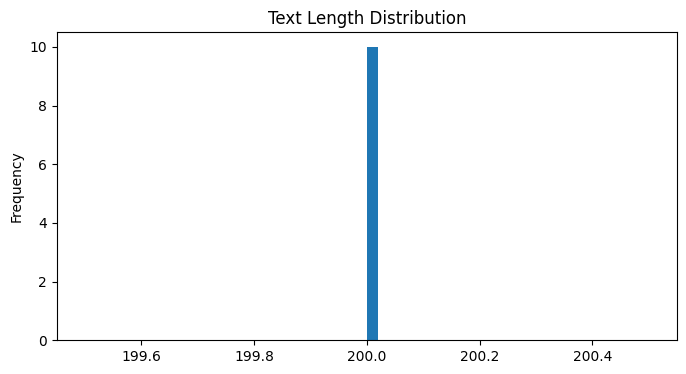

In [ ]:
# TODO: Visualize train and explain each column
import pandas as pd
import matplotlib.pyplot as plt

# Load the tokenized train dataset
train_file = os.path.join(data_dir, "train.csv")
train = pd.read_csv(train_file)

# Display the first few rows of the dataset
print("Sample of the Train Dataset:")
print(train.head())

# Visualize the distribution of sequence lengths
train['text_len'] = train['encodings'].apply(lambda x: len(eval(x)['input_ids']))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

train['text_len'].plot(kind='hist', bins=50, ax=axes, title='Text Length Distribution')

plt.show()


In [ ]:
# TODO: Data Loaders
# Fix code in utils_data.py

import torch
train_dataset, val_dataset = get_gpt2_dataset(train, val) # call function get_gpt2_dataset

b = train_dataset.__getitem__(0) # check one data row

# Create data loaders
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=1)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=1)

train_loader_len = len(train_dataloader)
print(f"Number of batches in the train data loader: {train_loader_len}")

In [ ]:
config = {
    "out_dir": "output_models",
    "training_models": "aragpt2_finetuned",
    "final_model": "aragpt2_final_model",
}

# fine tune pretrained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_dir = 'aubmindlab/aragpt2-base'

train = Train(device, model_dir, tokenizer_len, ignore_idx, train_loader_len, config)
train.train_model(train_dataloader, val_dataloader)